In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import imblearn
import pickle
import sklearn.model_selection as model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
new_data = pd.read_csv('./all/dataraning_new_data.csv') # upload the training set

In [3]:
new_data.head()

,Unnamed: 0,Resp,VL.t0,CD4.t0,rtlength,pr_A,pr_C,pr_G,pr_R,pr_T,pr_Y,PR_GC,RT_A,RT_C,RT_G,RT_R,RT_T,RT_Y,RT_GC
0,1,0,4.3,145,1005,104,51,67,2,71,2,0.402730,402,167,210,1,1,1,0.378134
1,2,0,3.6,224,909,110,49,65,73,0,0,0.383838,355,151,193,1,3,203,0.381375
2,3,0,3.2,1017,903,105,47,67,2,74,2,0.389078,360,146,181,1,7,201,0.368243
3,4,0,5.7,206,1455,105,49,71,1,71,0,0.405405,586,245,305,1,1,317,0.378527
4,5,0,3.5,572,903,105,50,69,73,0,0,0.400673,353,150,184,2,5,1,0.374439


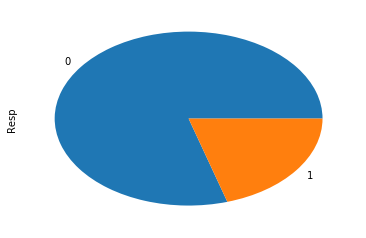

In [4]:
new_data["Resp"].value_counts().plot.pie()

In [5]:
#Lets see how correlated are the different features
new_data.corr()

,Unnamed: 0,Resp,VL.t0,CD4.t0,rtlength,pr_A,pr_C,pr_G,pr_R,pr_T,pr_Y,PR_GC,RT_A,RT_C,RT_G,RT_R,RT_T,RT_Y,RT_GC
Unnamed: 0,1.000000,0.316746,0.082143,0.038613,0.060402,-0.289413,-0.104817,-0.052061,-0.156757,0.037121,0.073843,0.039735,0.055431,0.039726,0.045710,-0.018059,-0.105165,0.024748,0.019547
Resp,0.316746,1.000000,0.363947,-0.127548,0.320095,-0.121435,-0.080273,-0.030747,-0.106768,0.046432,0.054466,-0.029655,0.315671,0.294487,0.269169,-0.045041,-0.118343,0.070142,0.105843
VL.t0,0.082143,0.363947,1.000000,-0.427281,0.327529,-0.010349,-0.011644,0.012650,-0.099714,0.063036,0.018848,-0.040033,0.324758,0.299423,0.300049,-0.085253,-0.080765,0.082630,0.060104
CD4.t0,0.038613,-0.127548,-0.427281,1.000000,-0.297203,-0.022918,0.044449,0.041038,0.086117,-0.024116,-0.044339,0.060032,-0.292327,-0.275972,-0.269580,0.063620,0.058562,-0.054134,-0.101756
rtlength,0.060402,0.320095,0.327529,-0.297203,1.000000,0.004620,0.001332,0.018774,-0.129542,0.045435,0.098628,-0.010285,0.997939,0.938903,0.944121,-0.090145,-0.076606,0.136990,0.485215
pr_A,-0.289413,-0.121435,-0.010349,-0.022918,0.004620,1.000000,0.165435,-0.123698,0.243491,0.000056,-0.188840,-0.495073,0.011044,0.009148,0.011599,0.097611,0.022571,-0.043869,-0.023715
pr_C,-0.104817,-0.080273,-0.011644,0.044449,0.001332,0.165435,1.000000,0.158018,0.062032,-0.024762,-0.053688,0.552580,0.006332,0.015336,0.010107,-0.063966,0.050509,-0.014506,0.011730
pr_G,-0.052061,-0.030747,0.012650,0.041038,0.018774,-0.123698,0.158018,1.000000,-0.024814,-0.007022,-0.022936,0.350968,0.020450,0.019386,0.014290,0.031384,-0.006384,-0.003723,0.028718
pr_R,-0.156757,-0.106768,-0.099714,0.086117,-0.129542,0.243491,0.062032,-0.024814,1.000000,-0.559403,-0.341439,-0.019549,-0.121479,-0.096217,-0.100271,0.188537,0.088849,-0.095437,-0.019180
pr_T,0.037121,0.046432,0.063036,-0.024116,0.045435,0.000056,-0.024762,-0.007022,-0.559403,1.000000,-0.459740,-0.054546,0.047112,0.058270,0.028524,-0.082375,-0.050419,0.053928,-0.026724


In [6]:
# Lets look at the missing data
new_data.isnull().sum().sum()

0

In [7]:
#Our dataset is imbalanced, lets fix that
VL = new_data['VL.t0'].values.tolist()   # get all the values of viral load in a list
CD4 = new_data['CD4.t0'].values.tolist() # get all the values of CD4+ cells in a list
rt_length = new_data['rtlength'].values.tolist()
pr_A = new_data['pr_A'].values.tolist()
pr_C = new_data['pr_C'].values.tolist()
pr_G = new_data['pr_G'].values.tolist()
pr_R = new_data['pr_R'].values.tolist()
pr_T = new_data['pr_T'].values.tolist()
pr_Y = new_data['pr_Y'].values.tolist()
pr_GC = new_data['PR_GC'].values.tolist()
rt_A = new_data['RT_A'].values.tolist()
rt_C = new_data['RT_C'].values.tolist()
rt_G = new_data['RT_G'].values.tolist()
rt_R = new_data['RT_R'].values.tolist()
rt_T = new_data['RT_T'].values.tolist()
rt_Y = new_data['RT_Y'].values.tolist()
rt_GC = new_data['RT_GC'].values.tolist()

inp = list(zip(VL,CD4,pr_A,pr_C,pr_G,pr_R,pr_T,pr_Y,pr_GC,rt_length,rt_A,rt_C,rt_G,rt_R,rt_T,rt_Y,rt_GC))  # create a new input feature with the two numerical features
lab = new_data["Resp"].values.tolist()



from imblearn.over_sampling import SMOTE
sm = imblearn.over_sampling.SMOTE(sampling_strategy = 'auto', kind = 'regular',random_state=5)

#VL.t0 ,CD4.t0 ,rtlength ,pr_A ,pr_C ,pr_G ,pr_R ,pr_T ,pr_Y ,PR_GC ,RT_A ,RT_C ,RT_G ,RT_R ,RT_T,RT_Y,RT_GC

inputs,label = sm.fit_sample(new_data[['VL.t0' ,'CD4.t0' ,'rtlength' ,'pr_A' ,'pr_C' ,'pr_G' ,'pr_R' ,'pr_T' ,'pr_Y' ,'PR_GC','RT_A' ,'RT_C' ,'RT_G' ,'RT_R' ,'RT_T','RT_Y','RT_GC'
]],new_data['Resp'])
print("Original dataset: ",new_data['Resp'].value_counts())

#the missing datas Are  deleted. Why?

compt = 0
for i in range(len(label)):
    if label[i]==1:
        compt += 1
print("\nNumber of 1 in the new  dataset: ",compt)


Original dataset:  0    733
1    187
Name: Resp, dtype: int64

Number of 1 in the new  dataset:  733


In [8]:
np.random.seed(90)
input_train, input_test, label_input, label_test = train_test_split(inputs, label,random_state=5)

# 1- k-Nearest Neighbors (k-NN) Algorithm

In [9]:
np.random.seed(6)
# search for an optimal value of K for KNN with cross validation
# range of k we want to try
k_range = range(2, 39)
# empty list to store scores
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, input_train, label_input, cv = 10, scoring='accuracy')
    #scores = cross_val_score(knn, inputs, label, cv = 10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print("k different averages:", k_scores)
print("\nMax average, index of Max:", max(k_scores),"||", k_scores.index(max(k_scores)))
pos = k_scores.index(max(k_scores))

k different averages: [0.7816567860604557, 0.7725736161515978, 0.7689287619562848, 0.7653334986362509, 0.7617051747326977, 0.7543411551668433, 0.7562168173177348, 0.7506796204043911, 0.7379020054249412, 0.7387945660422724, 0.7232893777847906, 0.718760754081855, 0.7123960657905611, 0.7033134969832218, 0.7043052393511109, 0.6978503106943472, 0.6933210858898933, 0.6924033541464734, 0.6951143971327457, 0.6969495600688261, 0.6914281420703439, 0.6860146969321281, 0.684146623687908, 0.6868822366987505, 0.6932710441884754, 0.6951474577162651, 0.6896512108438715, 0.6851221363147968, 0.6869321281247888, 0.6806423521102422, 0.6851800674736455, 0.6842791665727447, 0.6824524941956135, 0.6816011841699916, 0.6870725604670559, 0.6833864556800336, 0.6824940453380821]

Max average, index of Max: 0.7816567860604557 || 0


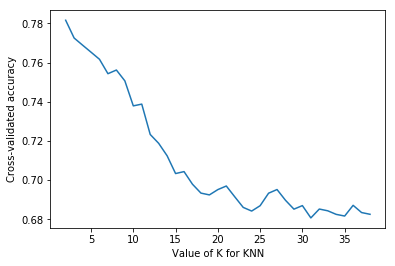

In [10]:
# plot how accuracy changes as we vary k
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [11]:
model = KNeighborsClassifier(3)
print("\t %%% Now lets fit our model first and then we test with our test set %%%")
model = model.fit(input_train,label_input)
print("\n Training score: ",model.score(input_train, label_input)) 
pred = model.predict(input_test)
#score = metrics.accuracy_score(pred, label_test)
score = model.score(input_test, label_test)
print("\nThe accuracy score that we get is: ",score)  
print("\n Confusion Matrix: ", confusion_matrix(label_test, pred))

	 %%% Now lets fit our model first and then we test with our test set %%%

 Training score:  0.8826205641492265

The accuracy score that we get is:  0.7220708446866485

 Confusion Matrix:  [[111  66]
 [ 36 154]]


# 2 - Multi Layer Perceptron (MLP) Algorithm

In [12]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,activation='relu',
                    hidden_layer_sizes=(950,950,950,2),random_state =5)

#print("\t%%%%% The following results are the different accuracies that we get at each step of the CV %%%%%")
#acc = cross_val_score(clf, input_train, label_input, cv=10, scoring='accuracy')
#print("\nAccuracies: ",acc)
#print("\nMean accuracy: ", acc.mean() )
print("\t %%% Now lets fit our model first and then we test with our test set %%%")
clf = clf.fit(input_train,label_input)
print("\n Training score: ",clf.score(input_train, label_input)) #evaluating the training error
pred = clf.predict(input_test)
score = metrics.accuracy_score(pred, label_test)
print("\nThe accuracy score that we get is: ",score)
print("\n Confusion Matrix: ", confusion_matrix(label_test, pred))

	 %%% Now lets fit our model first and then we test with our test set %%%

 Training score:  0.6424021838034577

The accuracy score that we get is:  0.6430517711171662

 Confusion Matrix:  [[ 61 116]
 [ 15 175]]


# 3 - Logistic Regression

In [13]:
#with cross validation
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
#print("\t%%%%% The following results are the different accuracy that we get at each step of the CV %%%%%")
#acc = cross_val_score(logReg, input_train, label_input, cv=10, scoring='accuracy')
#print("\nAccuracies: ",acc)
#print("\nMean accuracy: ", acc.mean() )

print("\n\t %%% Now lets fit our model first and then we test with our test set %%%")
logReg = logReg.fit(input_train,label_input)
print("\n Training score: ",logReg.score(input_train, label_input)) #evaluating the training error
pred = logReg.predict(input_test)
score = metrics.accuracy_score(pred, label_test)
print("\nThe accuracy score that we get is: ",score)
print("\n Confusion Matrix: ", confusion_matrix(label_test, pred))


	 %%% Now lets fit our model first and then we test with our test set %%%

 Training score:  0.7443130118289354

The accuracy score that we get is:  0.7193460490463215

 Confusion Matrix:  [[135  42]
 [ 61 129]]


/home/fadel/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 4 - SGD Classifier

In [14]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss="hinge", penalty="l2", max_iter=25,random_state=5)
sgdc = sgdc.fit(input_train, label_input)
print("\n Training score: ",sgdc.score(input_train, label_input)) #evaluating the training error
pred = sgdc.predict(input_test)
score = metrics.accuracy_score(pred,label_test)
print("\nThe accuracy score that we get is: ",score)
print("\n Confusion Matrix: ", confusion_matrix(label_test, pred))


 Training score:  0.6469517743403094

The accuracy score that we get is:  0.659400544959128

 Confusion Matrix:  [[ 98  79]
 [ 46 144]]


/home/fadel/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


# 5- Decision Tree Classifier

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [15]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=5)
dt = dt.fit(input_train, label_input)
print("\n Training score: ",dt.score(input_train, label_input)) #evaluating the training error
pred = dt.predict(input_test)
score = metrics.accuracy_score(pred,label_test)
print("\nThe accuracy score that we get is: ",score)
print("\n Confusion Matrix: ", confusion_matrix(label_test, pred))


 Training score:  1.0

The accuracy score that we get is:  0.782016348773842

 Confusion Matrix:  [[137  40]
 [ 40 150]]


# 6- Gradient Boosting Classifier

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=5)
GBC = GBC.fit(input_train, label_input)
print("\n Training score: ",GBC.score(input_train, label_input)) #evaluating the training error
pred = GBC.predict(input_test)
score = metrics.accuracy_score(pred,label_test)
print("\nThe accuracy score that we get is: ",score)
print("\n Confusion Matrix: ", confusion_matrix(label_test, pred))


 Training score:  0.9426751592356688

The accuracy score that we get is:  0.8119891008174387

 Confusion Matrix:  [[143  34]
 [ 35 155]]


# 7- Ada Boost Classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [17]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(random_state=5)
ABC = ABC.fit(input_train, label_input)
print("\n Training score: ",ABC.score(input_train, label_input)) #evaluating the training error
pred = ABC.predict(input_test)
score = metrics.accuracy_score(pred,label_test)
print("\nThe accuracy score that we get is: ",score)
print("\n Confusion Matrix: ", confusion_matrix(label_test, pred))


 Training score:  0.8644222020018199

The accuracy score that we get is:  0.8310626702997275

 Confusion Matrix:  [[144  33]
 [ 29 161]]


In [18]:
AdaBoostClassifier??

# 8- Dummy Classifier

DummyClassifier is a classifier that makes predictions using simple rules.
This classifier is useful as a simple baseline to compare with other
(real) classifiers. Do not use it for real problems.

In [19]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy="uniform",random_state=5)
dc = dc.fit(input_train, label_input)
print("\n Training score: ",dc.score(input_train, label_input)) #evaluating the training error
pred = dc.predict(input_test)
score = metrics.accuracy_score(pred,label_test)
print("\nThe accuracy score that we get is: ",score)
print("\n Confusion Matrix: ", confusion_matrix(label_test, pred))



 Training score:  0.4986351228389445

The accuracy score that we get is:  0.4904632152588556

 Confusion Matrix:  [[85 92]
 [95 95]]


# 9 - Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [20]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=11, random_state=5)
RF = RF.fit(input_train, label_input)
print("\n Training score: ",RF.score(input_train, label_input)) #evaluating the training error
pred = RF.predict(input_test)
score = metrics.accuracy_score(pred,label_test)
print("\nThe accuracy score that we get is: ",score)
print("\n Confusion Matrix: ", confusion_matrix(label_test, pred))


 Training score:  0.9827115559599636

The accuracy score that we get is:  0.8310626702997275

 Confusion Matrix:  [[150  27]
 [ 35 155]]


/home/fadel/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 10- Extra trees Classifier

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier(random_state=5)
ETC = ETC.fit(input_train, label_input)
print("\n Training score: ",ETC.score(input_train, label_input)) #evaluating the training error
pred = ETC.predict(input_test)
score = metrics.accuracy_score(pred,label_test)
print("\nThe accuracy score that we get is: ",score)
print("\n Confusion Matrix: ", confusion_matrix(label_test, pred))


 Training score:  1.0

The accuracy score that we get is:  0.8719346049046321

 Confusion Matrix:  [[153  24]
 [ 23 167]]


/home/fadel/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
